<a href="https://colab.research.google.com/github/MatheusRocha0/Recommendation-Engine/blob/main/Recommendation-Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project: Recommendation Engine
 
YouTube, Amazon, Facebook and Instagram are some of the companies that use this kind of implemantation. This kind of project is the most commonly used Data Science application in the entire world. Some years ago, you would have to hire the best statisticians and mathematicians of the world to build a nice system. But nowadays with our advanced technology, anyone can build their own recommendation system.
 
## Recommendation Engine Types
 
There are basically three distinct types of reccomender systems:
 
### Collaborative Filtering
 
This filtering method is usually based on collecting and analyzing information on user’s behaviors, their activities or preferences and predicting what they will like based on the similarity with other users. A key advantage of the collaborative filtering approach is that it does not rely on machine analyzable content and thus it is capable of accurately recommending complex items such as movies without requiring an “understanding” of the item itself.
 
### Content-Based Filtering
 
These filtering methods are based on the description of an item and a profile of the user’s preferred choices. In a content-based recommendation system, keywords are used to describe the items; besides, a user profile is built to state the type of item this user likes.
 
### Hybrid Recommendation Systems
 
Recent research shows that combining collaborative and content-based recommendation can be more effective. Hybrid approaches can be implemented by making content-based and collaborative-based predictions separately and then combining them. Further, by adding content-based capabilities to a collaborative-based approach and vice versa; or by unifying the approaches into one model.
 
#### Scikit Surprise
 
Surprise (stands for Simple Python Recommendation System Engine) is an easy-to-use Python scikit for recommender systems. This tool allows anyone to build Collaborative Filtering Reccomendation Engines easily using Python with few lines of code.
 
## About the Project
 
### Fictional Context
 
**Disclaimer**: the context I am going to present here is only for performance purposes. The CEO and the company only exist on my mind.
 
The All in One Place is a company that offers streaming services, but their users average watching time is not enough for the CEO.
Then he decided to hire me, a data science consultant, because he knew from friends that Data Science is helping many companies out there.
 
 I suggested to implement a Recommendation Engine into the platform, by doing this, the average time is going to get higher.
After he agreed I had access to their customers database so I could start working in the project.

# 0.0 Preparation

## 0.1 Installs

In [ ]:
pip install scikit-surprise -q

     |████████████████████████████████| 11.8MB 228kB/s 


## 0.2 Packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import pickle
 
from surprise import Reader, Dataset, SVDpp, accuracy
from surprise.model_selection import train_test_split

## 0.3 Loading data

In [ ]:
movies = pd.read_csv("https://raw.githubusercontent.com/MatheusRocha0/Recommendation_Engine/main/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/MatheusRocha0/Recommendation_Engine/main/ratings.csv")
 
movies.drop("genres", axis = 1, inplace = True)
ratings.drop("timestamp", axis = 1, inplace = True)
 
data = pd.merge(ratings, movies, on = "movieId")
data.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


## 0.4 Helper functions
 
Here go my functions

In [ ]:
def preprocess():
   reader = Reader(rating_scale = (0.5, 5))
   dataset = Dataset.load_from_df(data.drop("title", axis = 1), reader)
 
   train_set, test_set = train_test_split(dataset, test_size = .5)  
   return train_set, test_set
 
def api_request(sample):
 
   json = sample.to_json(orient = "records")
 
   url = "https://api-recommendation-engine.herokuapp.com/"
   data_ = json
   headers = {"Content-type": "application/json"}
 
   r = requests.post(url = url, data = data_, headers = headers)
 
   df = pd.DataFrame(r.json(), columns = r.json()[0].keys())
   return df

# 1.0 Data Cleaning
 
It is necessary to clean things from the dataset like: missing values, outliers, duplicates, etc.

Because it can affect the model's performance.

## 1.1 Treating Missing Values

In [ ]:
print("What is the number of missing values in each variable?")
print("Variable | Missing values:")
data.isnull().sum()

What is the number of missing values in each variable?
Variable | Missing values:


userId     0
movieId    0
rating     0
title      0
dtype: int64

## 1.2 Treating Duplicates

In [ ]:
data.drop_duplicates(inplace = True)

## 1.3 Treating Outliers
 
First of all it is necessary to know the 2 types of outliers: natural ones and artificial ones.
 
Artificial outliers can happen for many causes, like a typing error for example.
 
Natural outliers is a not common phenomenon that can be observed in real world.
 
But both can affect a machine learning model, that is why I have to exclude them.
 
### 1.3.1 Using boxplot to detect outliers
 
Boxplot is a chart that shows outliers as black points out of a box. But the only variable we need to do it is the Rating variable.

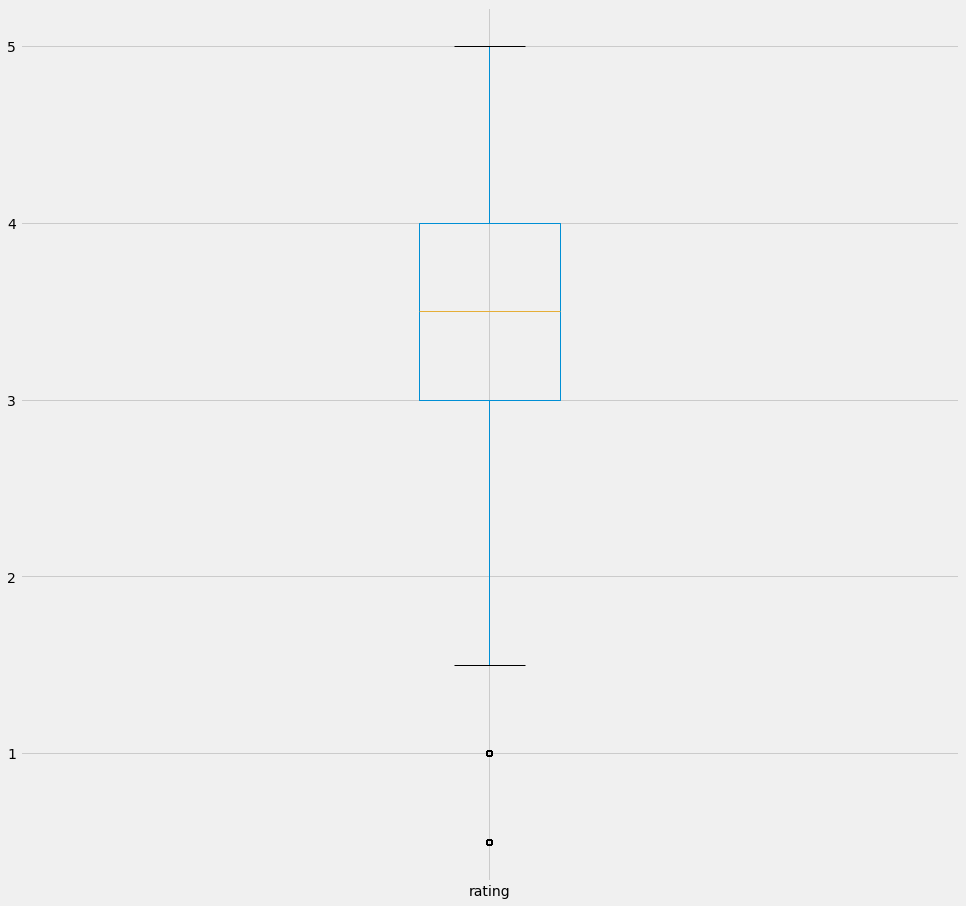

In [ ]:
data[["rating"]].boxplot(figsize = (15, 15))
plt.show()

Even the chart showing black points we can not consider them as outliers, since they are in the range of the variable.

# 2.0 Machine Learning model
 
Since our dataset seems to be clean we can now start working in the ML model. But before going to the coding part it is necessary to explain how this model will work.
 
This model will take 2 parameters: item id and user id. After this it will calculate how the user will rate the movie. It does it by analyzing how other similar users rated the same movie.
 
This model works like a classic regression algorithm.

## 2.1 Preparing the data
 
Before training the model it is necessary to apply some preprocessing methods to the data because the algotithms from Scikit Surprise need it.

In [ ]:
train_set, test_set = preprocess()

## 2.2 Training a model
 
Surprise provides many algorithms, but it is possible to see in the documentation that there is an algorithm that has a better performance than others, the SVD++ algorithm.

In [ ]:
engine = SVDpp(
random_state = 1,
n_epochs = 30,
lr_all = .01,
reg_all = .07
)
 
engine.fit(train_set)

## 2.3 Evaluating the model
 
Now I will use an evaluation metric to know how good this model really is.
 
There are many metrics data scientists can use, dozens of them. But the first thing we must know is that there are specific metrics for specific problems, in this case we have to use Regression metrics.
 
I chose RMSE (root mean squared error): is the standard deviation of the errors which occur when a prediction is made on a dataset. As any other regression metric, the smaller the better.

In [ ]:
 p = engine.test(test_set)
score = accuracy.rmse(p)

RMSE: 0.8765


Considering our problem 0.87 of error is good.

## 2.4 Saving the model

In [ ]:
fileObj = open('model.pkl', 'wb')
pickle.dump(engine,fileObj)
fileObj.close()

# 3.0 API requests
 
After I saved the model I could start building my API. I did it using Flask and deployed with Heroku.
 
It is necessary because now external machines can access this data science solution.

Make yourself at home to make some requests if you want.
 
It is now very simple to get predictions made by the model using Python:

In [ ]:
sample = data.drop(["rating", "title"], axis = 1).sample()
api_request(sample)

,userId,movieId,user_rating
0,564,94677,3.979293


## 3.1 Interpretation:
 
user_rating is the rating value

# **That's All**